In [25]:
#Importing the usual libraries.
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt

#Importing time functions to measure the processing time.
from time import process_time
from time import process_time_ns

#Setting style options.
np.set_printoptions(3)
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}

div.output_area {
    width: 55%;
}

"""

HTML('<style>{}</style>'.format(CSS))

Problem 1 - For randomly generated $\mathbf{A} \in \mathbb{C}^{N \times N}$ and $\mathbf{B} \in \mathbb{C}^{N \times N}$, evaluate the computational performance (run time) of the following matrix inversion formulas: 

(a) for n $\in$ {2,4,8,16,32,64}
<br>
Method 1: $(\mathbf{A}_{N \times N} \otimes \mathbf{B}_{N \times N})^{-1}$
<br>
Method 2: $\mathbf{A}^{-1}_{N \times N} \otimes \mathbf{B}^{-1}_{N \times N}$

<font color='red'>Solution:</font>

In [21]:
#Creating an array to alocate the required sizes for n.
N = np.array([2,4,8,16,32,64])
#Creating a variable Size that has the number of elements presents in the array N. This'll be used in the next cells.
Size = len(N)

In [8]:
#For the first method:

#Creating an array that'll be used to alocate the values of elapsed time since the beginning of the operation.
elapsed_time01 = np.zeros([Size])

#The external for will compute the monte carlo simulation for a solution with a better stability.
for k in range(0,100):
    #The inside for will go through the elements of the array N and will create apropriate matrices for the problem.
    for i in range(0,Size):
       
        #In the next two line the complex matrices (A,B) are created with random values from a normal distribution with zero mean e unitary variance.
        A = np.random.randn(N[i],N[i]) + 1j*np.random.randn(N[i],N[i])
        B = np.random.randn(N[i],N[i]) + 1j*np.random.randn(N[i],N[i])
      
        #This is the exact moment when the timer starts to count. 
        #Is important to use the function in nanoseconds scale for an output with a better precision.
        current_time = process_time_ns()
       
        #In the next line first the kronecker product between (A,B) is calculated and then the inverse is computed.
        np.linalg.inv(np.kron(A,B))
        #OBS:Since the objective isn't the direct result of this process, the alocation of the result in a matrix C was discarded so          as not to waste any time.
      
        #Finally, in this line the timer stops and the diference between the system time at the beginning of process and at the end           of process is processed in nanoseconds.
        #Since the monte carlo is being used, is necessary to realize a summation of every run.
        elapsed_time01[i] = elapsed_time01[i] + (process_time_ns() - current_time)

#In the end, a mean to the process is processed.
elapsed_time01 = elapsed_time01/100

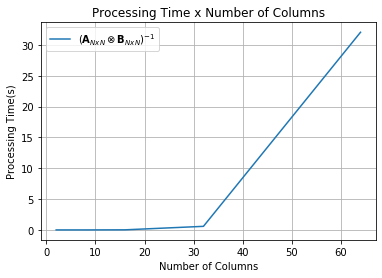

In [22]:
plt.figure()
plt.plot(N,elapsed_time01*10**-9, label = '$(\mathbf{A}_{N x N} \otimes \mathbf{B}_{N x N})^{-1}$')
plt.title('Processing Time x Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(s)')
plt.grid()
plt.legend()
plt.show()

In [10]:
#For the second method:

#Creating an array that'll be used to alocate the values of elapsed time since the beginning of the operation.
elapsed_time02 = np.zeros([Size])

#The external for will compute the monte carlo simulation for a solution with a better stability.
for k in range(0,100):
    #The inside for will go through the elements of the array N and will create apropriate matrices for the problem.
    for i in range(0,Size):
       
        #In the next two line the complex matrices (A,B) are created with random values from a normal distribution with zero mean e           unitary variance.
        A = np.random.randn(N[i],N[i]) + 1j*np.random.randn(N[i],N[i])
        B = np.random.randn(N[i],N[i]) + 1j*np.random.randn(N[i],N[i])
     
        #This is the exact moment when the timer starts to count. 
        #Is important to use the function in nanoseconds scale for an output with a better precision.
        current_time = process_time_ns()
       
        #In the next line first the inverse matrices of(A,B) are calculated and then the kronecker product is computed.
        np.kron(np.linalg.inv(A),np.linalg.inv(B))
        #OBS:Since the objective isn't the direct result of this process, the alocation of the result in a matrix C was discarded so          as not to waste any time.

        #Finally, in this line the timer stops and the diference between the system time at the beginning of process and at the end           of process is processed in nanoseconds.
        #Since the monte carlo is being used, is necessary to realize a summation of every run.
        elapsed_time02[i] = elapsed_time02[i] + (process_time_ns() - current_time)

#In the end, a mean to the process is processed.
elapsed_time02 = elapsed_time02/100

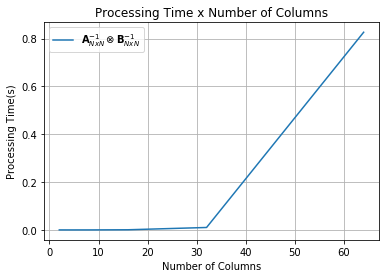

In [11]:
plt.figure()
plt.plot(N,elapsed_time02*10**-9, label = '$\mathbf{A}^{-1}_{N x N} \otimes \mathbf{B}^{-1}_{N x N}$')
plt.title('Processing Time x Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(s)')
plt.grid()
plt.legend()
plt.show()

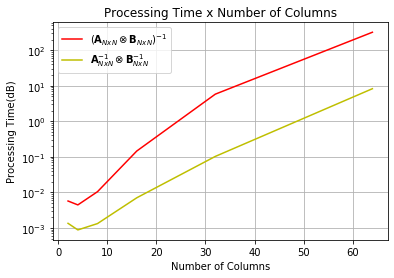

In [12]:
plt.figure()
plt.semilogy(N,10*elapsed_time01*10**-9,'r', label = '$(\mathbf{A}_{N x N} \otimes \mathbf{B}_{N x N})^{-1}$')
plt.semilogy(N,10*elapsed_time02*10**-9,'y', label = '$\mathbf{A}^{-1}_{N x N} \otimes \mathbf{B}^{-1}_{N x N}$')
plt.title('Processing Time x Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(dB)')
plt.grid()
plt.legend()
plt.show()

As we can see, the computation of $()^{-1}$ and then $\otimes$ is far less cheaper than $\otimes$ and then $()^{-1}$. This way, is important to always tried to use that propertie when possible since it can make the calculation of inverse in big matrices a lot easier.

(b) for K $\in$ {2,4,6,8,10}
<br>
Method 1: $(\mathbf{A}^{(1)}_{4 \times 4} \otimes \mathbf{A}^{(2)}_{4 \times 4} \otimes ... \otimes \mathbf{A}^{(K)}_{4 \times 4})^{-1} = (\otimes^{K}_{i = 1} \mathbf{A}^{(i)}_{4 \times 4})^{-1}$
<br>
Method 2: $(\mathbf{A}^{(1)})^{-1}_{4 \times 4} \otimes (\mathbf{A}^{(2)})^{-1}_{4 \times 4} \otimes ... \otimes (\mathbf{A}^{(K)})^{-1}_{4 \times 4} = \otimes^{K}_{i = 1} (\mathbf{A^{(i)}})^{-1}_{4 \times 4}$

<font color='red'>Solution:</font>


In [13]:
#Creating an array to alocate the required sizes for n.
N = np.array([2,4,6])
#Creating a variable Size that has the number of elements presents in the array N. This'll be used in the next cells.
Size = len(N)

In [14]:
#For the first method:

#Creating an array that'll be used to alocate the values of elapsed time since the beginning of the operation.
elapsed_time03 = np.zeros([Size])
#Creating the complex matrix A.
A = np.random.rand(4,4) + 1j*np.random.rand(4,4)

#The external for will compute the monte carlo simulation for a solution with a better stability.
for k in range(0,100):
    #The inside for will go through the elements of the array N and will create apropriate matrices for the problem.
    for i in range(0,Size):
        
        #In this line a complex n-array will be created, where the first dimension will storage the number of matrices A in this              n-array.
        A_list = np.zeros([N[i],4,4],dtype = 'complex')
        #And here the matrix A will be alocated as said before.
        A_list[:,:,:] = A
        
        #This is the exact moment when the timer starts to count. 
        #Is important to use the function in nanoseconds scale for an output with a better precision.
        current_time = process_time_ns()
       
        #In the next line every matrix present on the list will be used in a "kronecker productory" and then the inverse will be              calculated.
        np.linalg.inv(tl.tenalg.kronecker(A_list))
        #OBS: It was decided to use tensorly here because the function .kronecker() already have a funcionality of "productory".
        #OBS:Since the objective isn't the direct result of this process, the alocation of the result in a matrix C was discarded so          as not to waste any time.
        
        #Finally, in this line the timer stops and the diference between the system time at the beginning of process and at the end           of process is processed in nanoseconds.
        #Since the monte carlo is being used, is necessary to realize a summation of every run.
        elapsed_time03[i] = elapsed_time03[i] + (process_time_ns() - current_time)

#In the end, a mean to the process is processed.
elapsed_time03 = elapsed_time03/100

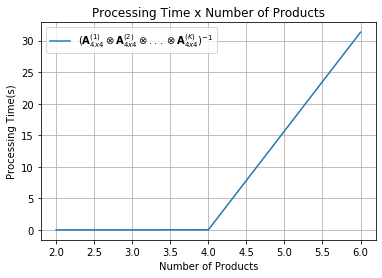

In [15]:
plt.figure()
plt.plot(N,elapsed_time03*10**-9, label = '$(\mathbf{A}^{(1)}_{4 x 4} \otimes \mathbf{A}^{(2)}_{4 x 4} \otimes ... \otimes \mathbf{A}^{(K)}_{4 x 4})^{-1} $')
plt.title('Processing Time x Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Processing Time(s)')
plt.grid()
plt.legend()
plt.show()

In [16]:
#For the second method:

#Creating an array that'll be used to alocate the values of elapsed time since the beginning of the operation.
elapsed_time04 = np.zeros([Size])
#Creating the complex matrix A.
A = np.random.rand(4,4) + 1j*np.random.rand(4,4)

#The external for will compute the monte carlo simulation for a solution with a better stability.
for k in range(0,100):
    #The inside for will go through the elements of the array N and will create apropriate matrices for the problem.
    for i in range(0,Size):
        
        #In this line a complex n-array will be created, where the first dimension will storage the number of matrices A in this              n-array.
        A_list = np.zeros([N[i],4,4],dtype = 'complex')
        
        #This is the exact moment when the timer starts to count. 
        #Is important to use the function in nanoseconds scale for an output with a better precision.
        current_time = process_time_ns()
        
        #The inverse here will be calculated in every matrix of the list before the "kronecker productory".
        A_list[:,:,:] = np.linalg.inv(A)
        #In the next line every matrix present on the list will be used in a "kronecker productory".
        tl.tenalg.kronecker(A_list)
        #OBS:It was decided to use tensorly here because the function .kronecker() already have a funcionality of "productory".
        #OBS:Since the objective isn't the direct result of this process, the alocation of the result in a matrix C was discarded so          as not to waste any time.

        #Finally, in this line the timer stops and the diference between the system time at the beginning of process and at the end           of process is processed in nanoseconds.
        #Since the monte carlo is being used, is necessary to realize a summation of every run.
        elapsed_time04[i] = elapsed_time04[i] + (process_time_ns() - current_time)

#In the end, a mean to the process is processed.
elapsed_time04 = elapsed_time04/100

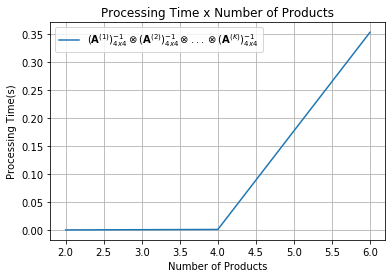

In [17]:
plt.figure()
plt.plot(N,elapsed_time04*10**-9, label = '$(\mathbf{A}^{(1)})^{-1}_{4 x 4} \otimes (\mathbf{A}^{(2)})^{-1}_{4 x 4} \otimes ... \otimes (\mathbf{A}^{(K)})^{-1}_{4 x 4}$')
plt.title('Processing Time x Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Processing Time(s)')
plt.grid()
plt.legend()
plt.show()

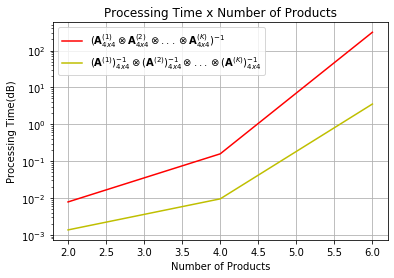

In [18]:
plt.figure()
plt.semilogy(N,10*elapsed_time03*10**-9,'r', label = '$(\mathbf{A}^{(1)}_{4 x 4} \otimes \mathbf{A}^{(2)}_{4 x 4} \otimes ... \otimes \mathbf{A}^{(K)}_{4 x 4})^{-1} $')
plt.semilogy(N,10*elapsed_time04*10**-9,'y', label = '$(\mathbf{A}^{(1)})^{-1}_{4 x 4} \otimes (\mathbf{A}^{(2)})^{-1}_{4 x 4} \otimes ... \otimes (\mathbf{A}^{(K)})^{-1}_{4 x 4}$')
plt.title('Processing Time x Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Processing Time(dB)')
plt.grid()
plt.legend()
plt.show()

since this is just a generalization of the previously item, there's not much that can be said about the result once they turn to be the way it should. The only thing that should be pointed out its how expensive is to a computer to calculate the inverse of a matrix once his size grows larger.

Problem 2 - Let eig($\mathbf{X}$) be the function that returns the matrix $\sum_{K \times K}$ of eigenvalues of $\mathbf{X}$.
Show algebraically that eig($\mathbf{A} \otimes \mathbf{B}$) = eig($\mathbf{A}$) $\otimes$ eig($\mathbf{B}$).

Hint: Use the property $(\mathbf{A} \otimes \mathbf{B})(\mathbf{C} \otimes \mathbf{D}) = \mathbf{AC} \otimes \mathbf{BD}$

<font color='red'>Solution:</font>

Be the Single Value Decomposition of A and B defined as bellow:

\begin{equation}
    A = U_{a} S_{a} V^{H}_{a} 
\end{equation}

\begin{equation}
    B = U_{b} S_{b} V^{H}_{b} 
\end{equation}

This way is possible to write the following relation between the matrices and their kronecker:

\begin{equation}
    A \otimes B = (U_{a} S_{a} V^{H}_{a}) \otimes (U_{b} S_{b} V^{H}_{b})
\end{equation}

Using the property presented in the problem and defining $\mathbf{A} = U_{a}$, $\mathbf{B} = U_{b}$, $\mathbf{C} = S_{a} V^{H}_{a}$, $\mathbf{D} = S_{b} V^{H}_{b}$ is possible to rewrite the equation as:

\begin{equation}
    A \otimes B = (U_{a} \otimes U_{b})(S_{a} V^{H}_{a} \otimes S_{b} V^{H}_{b})
\end{equation}

Using the same property again but this time on only on the terms around the second kronecker product is possible to rewrite the equation to his final form:

\begin{equation}
    A \otimes B = (U_{a} \otimes U_{b})(S_{a} \otimes S_{b})(V^{H}_{a} \otimes V^{H}_{b})
\end{equation}

Since the operator eig(-) returns the matrix of eigenvalues, if its applied to the kronecker between $\mathbf{A}$ and $\mathbf{B}$:

\begin{equation}
    eig(A \otimes B) = eig((U_{a} \otimes U_{b})(S_{a} \otimes S_{b})(V^{H}_{a} \otimes V^{H}_{b}))
\end{equation}

Since the eigenvalues will be present only on the matrices $\mathbf{S}_{a}$ and  $\mathbf{S}_{b}$, the value returned by the operator eig(-) will be:

\begin{equation}
    eig(A \otimes B) = S_{a} \otimes S_{b}
\end{equation}

Since $S_{a}$ and $S_{b}$ are the matrices of eigenvalues of $\mathbf{A}$ and $\mathbf{B}$ is possible to rewriten the equation on the right using the eig(-) operator as:

\begin{equation}
    eig(A \otimes B) = eig(A) \otimes eig(B)
\end{equation}


## About this notebook

**Author**: Kenneth B. dos A. Benício

**Uptaded on**: 2020-03-17